In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## <center> Методы понижения размерности

### 1. Метод главных компонент (PCA)

**Метод главных компонент (Principal Component Analisys, PCA)** - метод машинного обучения без учителя, который позволяет снизить размерность данных, стараясь при этом потерять как можно меньше информации через вычисление так называемых ***главных компонент***.

**Зачем может понадобится снижать размерность данных?**
1. Для визуализацти данных - данные с большим количеством признаком сложно визуализировать. PCA может сжать данные до двух признаков, которые удобно визуализировать в двумерном пространстве
2. Для снижения количества пизнаков - стараемся найти признаковое пространство меньшего размера, которое будет лучше отражать взаимосвязи в данных
3. Избавление от шума в данных


**В чем идея метода?**

На картинке в верхнем левом углу изображены исходные данные, для которых заданы два признака (отложены по осям Х и Y). Видно, что есть довольно сильная корреляция между признаками. Метод предполагает такие шаги:

1. Находим направление в данных с максимальной дисперсией (разбросом). Именно оно содержить наибольшую информацию, т.к. вдоль него наибольшая корреляция. Это и будет **Первая главная компонента**. 
2. Находим второе направление, которое содержит наибольшую информацию, и при этом ортогонально (перпендикулярно) первому - **Вторая главная компонента**.
3. Повернем данные так, чтобы по осям у нас были отложены не признаки, а компоненты: **X**-первая главная компонента, **Y**-вторая главная компонента. Такое вращение привело к тому, что теперь корреляция в данных отсутсвует (вверхний правый рисунок). Кроме того, перед поворотом мы отцентрировали данные так, что среднее находится в нуле (вычли из каждого значения среднее).
4. Сейчас у нас количество компонент равняется количеству исходных признаков. Мы не сделали понижение размерности, только повернули систему координат. Попробуем сжать данные. Для этого оставим только наиболее информативную компоненту, таковой является первая (нижний левый рисунок). Вот мы и понизили размерность данных, теперь с ними можно работать.
5. Мы можем вернуть данные обратно в исходное признаковое пространство. Для этого отменим вращение и прибавим среднее (нижний правый рисунок). Мы вернулись в исходное признаквое пространство, но при этом сохранили только часть информации. 
Обратное возвращение можно делать тогда, когда мы хотим отфильтровать исходные данные.


<img src='https://github.com/MalikaL17/course_materials/blob/main/img/pca.PNG?raw=true'>

**Важные выводы:**
- Главные компоненты отражают основные направления ***диспресии*** данных
- Из пункта выше вытекает, что метод очень ***чувствителен к масштабу*** данных. Если масштаб данных разный, надо обязательно нормировать данные перед применением метода
- После преобразования данных с помощью PCA, оси ***не коррелируют*** между собой

Рассмотрим более подробно, что собой представляют главные компоненты и как их можно интерпретировать.

Главные компоненты - ***линейные комбинация*** исходных признаков. Это можно отразить формулой:

$$ pc = \sum_{i=1}^n\alpha_{i} x_{i}$$
$pc$ - значение  главной компоненты 

$\alpha_{i}$ - вес i-го признака в компоненте

$x_{i}$ - значения i-го признака из исходных данных

In [177]:
df = pd.read_csv('pca.csv')
df.head()

,math,rus
0,46.704934,57.524393
1,68.678641,60.282749
2,58.831524,56.293623
3,75.557776,52.350720
4,71.388141,61.555425


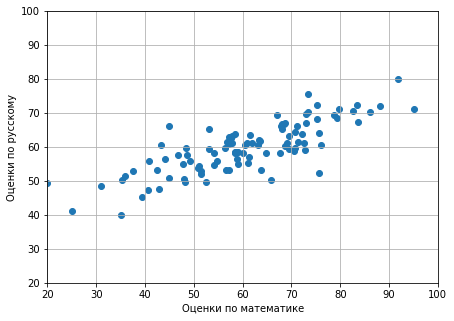

In [181]:
plt.figure(figsize=(7,5))
plt.scatter(df['math'], df['rus']);
plt.xlabel('Оценки по математике');
plt.ylabel('Оценки по русскому');
plt.grid();
plt.xlim(20, 100);
plt.ylim(20, 100);

In [179]:
# применим PCA к данным
pca = PCA()
pca_data = pca.fit_transform(df[['math', 'rus']])
pca_data = pd.DataFrame(pca_data, columns=['comp1', 'comp2'])

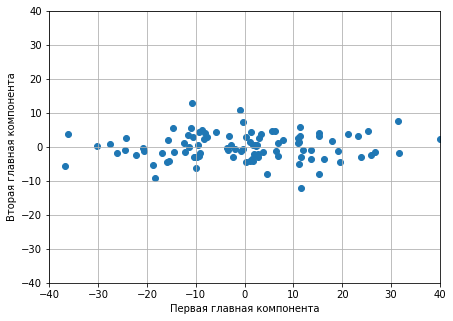

In [182]:
plt.figure(figsize=(7,5))
plt.scatter(pca_data['comp1'], pca_data['comp2']);
plt.grid();
plt.xlim(-40, 40);
plt.ylim(-40, 40);
plt.xlabel('Первая главная компонента');
plt.ylabel('Вторая главная компонента');

Посмотрим на веса признаков в полученных компонентах.
Видно, что в первую компоненту больший вклад вносит математика, обе переменные вносят положительный вклад.
Во вторую больший вклад вносит русский, при этом переменные вносят разнонапрвленный характер.

In [180]:
# выведем компоненты, отсортированные по важности
pca.components_

# -0.9 * x1 - 0.4*x2
# 0.4*x1 - 0.91*x2

array([[-0.91224408, -0.40964708],
       [ 0.40964708, -0.91224408]])

***Хорошая <a href="http://math-info.hse.ru/f/2015-16/ling-mag-quant/lecture-pca.html"> статья  </a> про PCA и интерпретацию результатов***

**Пример понижения размерности**

Рассмотрим встроеный в sklearn набор данных об онкобольных. Данные разделены на два класса: 1 - доброкачественная опухоль, 0 - злокачественная опухоль. 

In [184]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Данные содержат 30 признаков, что делает визуальный анализ диаграмм рассеяния довольно сложным. Построим гистограммы в развере двух классов, чтобы посмотреть, есть ли различия в признаках для каждого класса.

In [188]:
cancer.data.shape

(569, 30)

Из гистограмм ниже видно, что по некоторым признакам есть довольно сильное отличие между двумя классами, а по некоторым - нет.
Также эти графики не дают нам никакой информации о взаимодействии между переменными и взаимосвязях между признаками
и классами зависимой переменной. Попробуем использвать PCA, чтобы учесть эти взаимодействия.

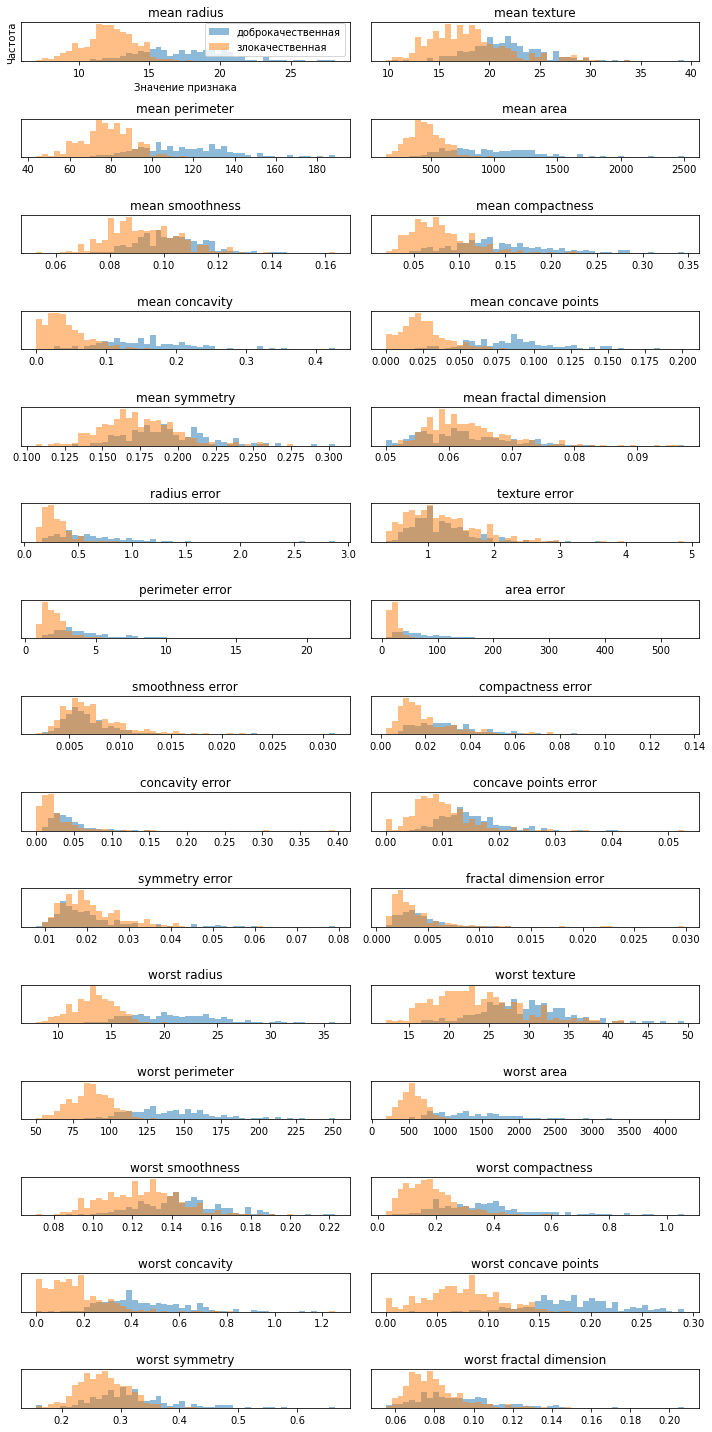

In [191]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5) # color=mglearn.cm3(0),
    ax[i].hist(benign[:, i], bins=bins,  alpha=.5) # color=mglearn.cm3(2),
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Значение признака")
    ax[0].set_ylabel("Частота")
    ax[0].legend(["доброкачественная", "злокачественная"], loc="best")
    fig.tight_layout()

In [195]:
# Масштабируем данные для корректной работы PCA
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [196]:
# оставляем только 2 компоненты, чтобы удобно было сделать двумерную визуализацию
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [198]:
X_pca.shape

(569, 2)

Из диаграммы ниже видно, что после уменьшения размерности классы довольно хорошо разделяются линейно. При этом, стоит подчеркнуть, что алгоритм ничего не знал о наличии двух классов, мы просто использовали эту информацию, чтобы раскрасить точки разными цветами.

C:\Users\Malika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Вторая главная компонента')

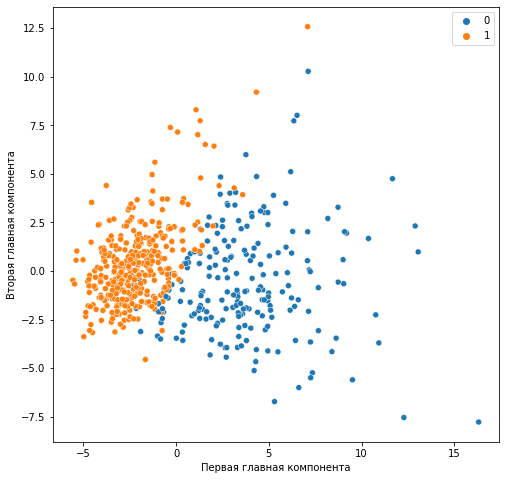

In [219]:
plt.figure(figsize=(8, 8))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=cancer.target);
plt.xlabel("Первая главная компонента");
plt.ylabel("Вторая главная компонента");

### 2. t-SNE

**t-SNE** (t-distributed stochastic neighbor embedding) - стохастическое вложение соседей с распределением Стьюдента.

В основном метод направлен на **визуализацию**, а не обучение. Он создает новое представление обучающих данных, но при этом не осуществляют преобразования новых данных. Поэтому может применяться только в ***разведочном анализе***.

**Идея метода:**  Найти ***двумерное*** представление данных, которое сохраняет ***расстояния между точками*** наилучшим образом. 

**t-SNE** начинает свою работу со случайного двумерного представления каждой точки данных, а затем пытается сблизить точки, которые в пространстве исходных признаков находятся близко друг к другу, и отдаляет друг от друга точки, которые находятся далеко друг от друга. 

При этом t-SNE уделяет большее внимание сохранению расстояний между точками, близко расположенными друг к другу. Иными словами, он пытается сохранить информацию, указывающую на то, какие точки являются соседями друг другу.

**Пример**

Рассмотрим пример на картинках цифр, набор данных также встроеный в sklearn. Каждая картинка представляет собой изображение размером 8 на 8 пикселей. 

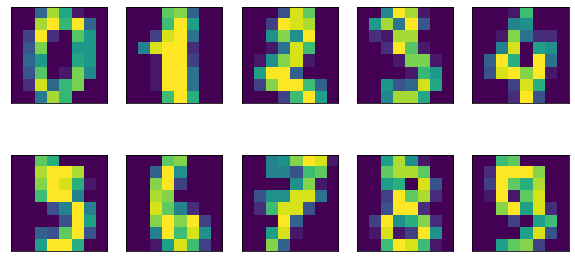

In [53]:
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [221]:
digits.data.shape

(1797, 64)

In [230]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

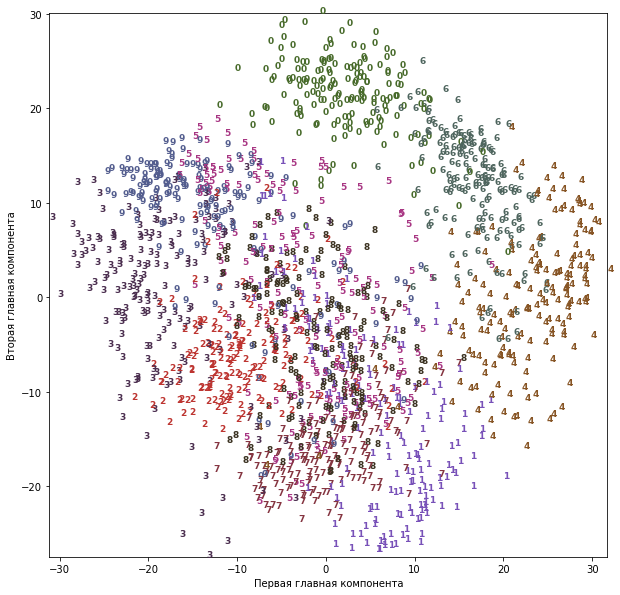

In [58]:
# строим модель PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("Первая главная компонента")
    plt.ylabel("Вторая главная компонента")

PCA неплохо выделил цифры 0, 4 и 6 по первой компоненте, остальные смешались. Посмотрим, как отработает t-SNE.

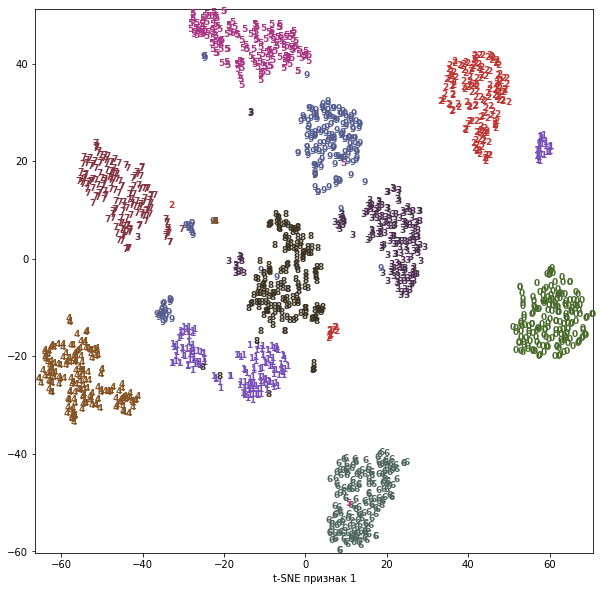

In [63]:
tsne = TSNE(random_state=42)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("t-SNE признак 0")
    plt.xlabel("t-SNE признак 1")

**Не все так просто!**

Результат работы t-SNE может сильно зависеть от параметров.

Например, от параметра ***perplexity*** - количество ближайших соседей. Оптимальными считаются значения от 5 от 50. На рисунке ниже представлены результаты работы алгоритма при разных значениях параметра.

<img src='https://github.com/MalikaL17/course_materials/blob/main/img/tsne_perplexity.PNG?raw=true'>

Кроме того, при слишком маленьком значении этого параметра можно увидеть кластеры там, где на самом деле их нет и данные случайны

<img src='https://github.com/MalikaL17/course_materials/blob/main/img/tsne_random.PNG?raw=true'>

Также важныйм параметром является количество итераций. При недостаточном количестве итераций алгоритм может остановить работу до того, как найдет устойчивое решение

<img src='https://github.com/MalikaL17/course_materials/blob/main/img/tsne_steps.PNG?raw=true'>


**Больше примеров того, как t-SNE зависит от параметров можно найти в <a href="https://distill.pub/2016/misread-tsne/"> статье </a>**

### 3. LLE - Локальное линейное вложение 

Не смотря на своеё название является методом НЕлинейного понижения размерности

Сначала измеряет, как каждый обучающий образец линейно связан со своими ближайшими соседями, и затем ищет представление обучающего набора с меньшим количеством измерений, где такие локальные связи лучше всего сохраняются

Очень эффективен при развертывании скрученных многообразий



In [2]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)


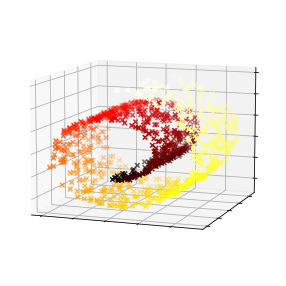

In [5]:
plt.figure(figsize=(6, 5))

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

In [6]:
%%time
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X)

Wall time: 1.98 s


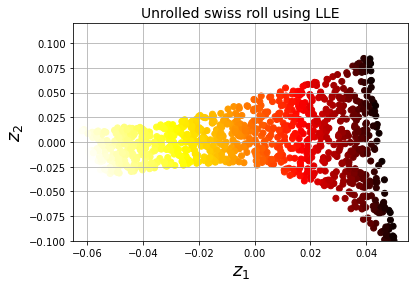

In [7]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

### Другие методы понижения размерности

**Многомерное шкалирование:** понижает размерность, одновременно пытаясь сохранить расстояние между образцами

In [10]:
%%time
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

Wall time: 2min 9s


**Изометрические отображения:** Создает граф, соединяя каждый образец с его ближайшими соседями и затем понижает размерность, одновременно пытаясь сохранить геодезическое расстояние (количество ребер между вершинами графа) между образцами

In [12]:
%%time
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

Wall time: 2.34 s


In [13]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

Wall time: 25.8 s


**Факторизация неотрицательных матриц:**

Он работает так же, как PCA, а также его можно использовать для уменьшения размерности. Как и в РСА, мы пытаемся записать каждую точку данных в виде взвешенной суммы некоторых компонентов. Однако, если в PCA нам нужно получить ортогональные компоненты, объясняющие максимально возможную долю дисперсии данных, то в NMF нам нужно получить неотрицательные компоненты и коэффициенты, то есть нам нужны компоненты и коэффициенты, которые больше или равны нулю. Поэтому этот метод может быть применен только к тем данным, в которых характеристики имеют неотрицательные значения, поскольку неотрицательная сумма неотрицательных компонентов не может быть отрицательной.

In [14]:
%%time
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

Wall time: 343 ms


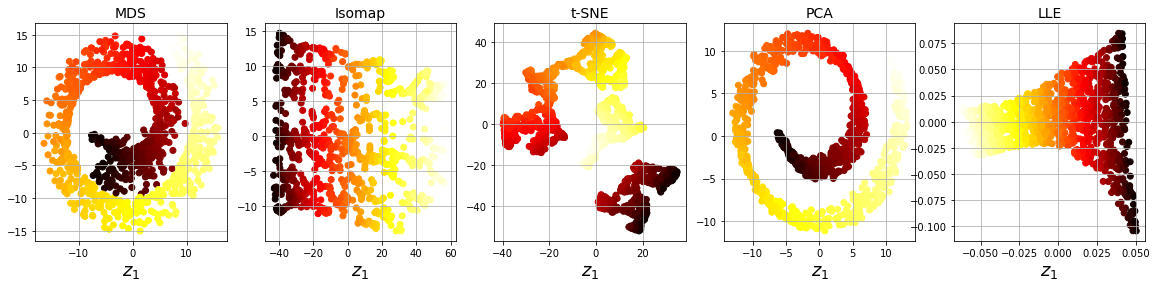

In [15]:
titles = ["MDS", "Isomap", "t-SNE", "PCA", "LLE"]

plt.figure(figsize=(24,4))

for subplot, title, X_reduced in zip((161, 162, 163, 164, 165), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne, X_reduced_pca, X_reduced_lle)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()